<a href="https://colab.research.google.com/github/Er-Manav/Indian-Currency-Recognition/blob/master/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Importing requred libraries

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


Importing fastai 

In [ ]:
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

Downloading own dataset

In [ ]:
!kaggle datasets download -d ermanav/indiancurrencydataset

 94% 270M/288M [00:02<00:00, 144MB/s]
100% 288M/288M [00:02<00:00, 131MB/s]


Unzipping the dataset

In [ ]:
!unzip "*.zip" 


Archive:  indiancurrencydataset.zip
  inflating: test_data/010.jpg       
  inflating: test_data/0100.jpg      
  inflating: test_data/020.jpg       
  inflating: test_data/050.jpg       
  inflating: test_data/0No Money.jpg  
  inflating: test_data/1010.jpg      
  inflating: test_data/10100.jpg     
  inflating: test_data/1020.jpg      
  inflating: test_data/1050.jpg      
  inflating: test_data/10No Money.jpg  
  inflating: test_data/110.jpg       
  inflating: test_data/1100.jpg      
  inflating: test_data/1110.jpg      
  inflating: test_data/11100.jpg     
  inflating: test_data/1120.jpg      
  inflating: test_data/11200.jpg     
  inflating: test_data/112000.jpg    
  inflating: test_data/1150.jpg      
  inflating: test_data/11No Money.jpg  
  inflating: test_data/120.jpg       
  inflating: test_data/1210.jpg      
  inflating: test_data/12100.jpg     
  inflating: test_data/1220.jpg      
  inflating: test_data/122000.jpg    
  inflating: test_data/1250.jpg      
  inflati

In [ ]:
tfms = get_transforms(do_flip=True)
np.random.seed(42)
data = ImageDataBunch.from_folder(Path("/content/training"), train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


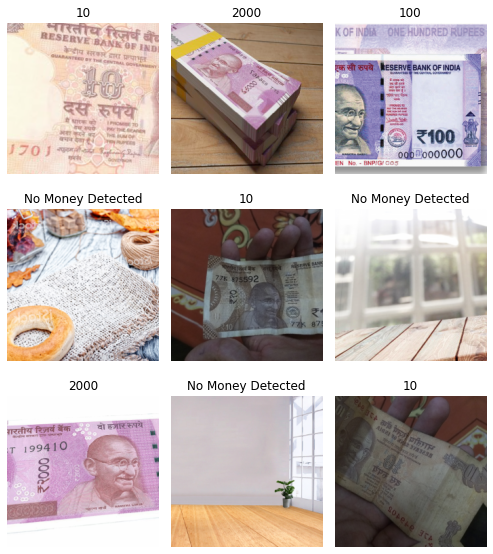

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

declaring learn variable

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Training our model

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.928128,1.121149,0.693750,00:43
1,1.155918,0.538738,0.856250,00:41
2,0.820276,0.282469,0.918750,00:41
3,0.633882,0.247927,0.937500,00:40


Mounting google drive to save our progress

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


making directory in drive to save pkl file

In [ ]:
os.makedirs("/content/drive/My Drive/aiprojects/money_detector",exist_ok=True)

assigning our path to my_dir variable for convenience

In [ ]:
my_dir="/content/drive/My Drive/aiprojects/money_detector"

Saving our file to Stage1 folder

In [ ]:
learn.save(my_dir+"/Stage-1")

learning our model again for better accuracy

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.193477,0.222910,0.937500,00:41
1,0.162749,0.208282,0.950000,00:41


loading the data in stage1 after learning again

In [ ]:
learn.load(my_dir+"/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (644 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
100,100,100,100,100
Path: /content/training;

Valid: LabelList (160 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
No Money Detected,200,No Money Detected,10,10
Path: /content/training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

exporting pkl file

In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

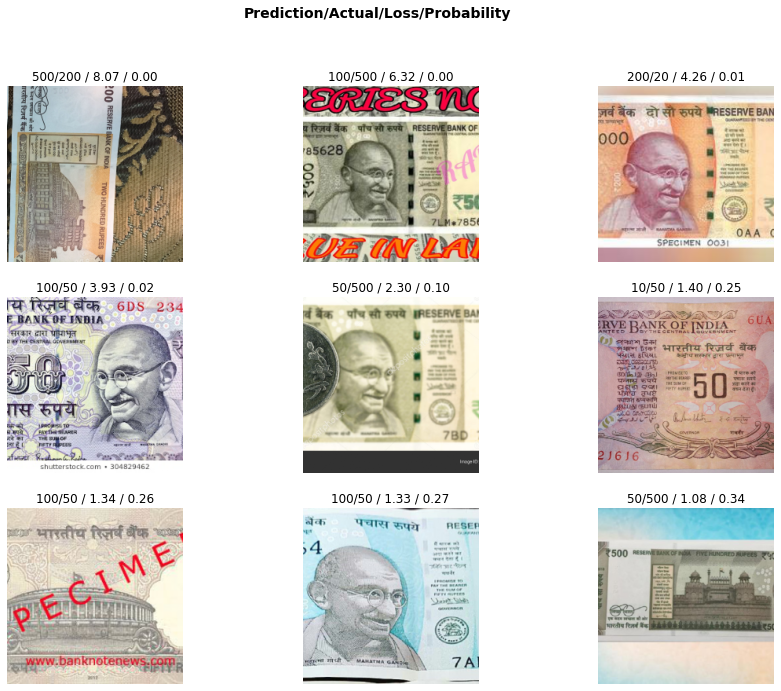

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

Plotting Confusion Matrix

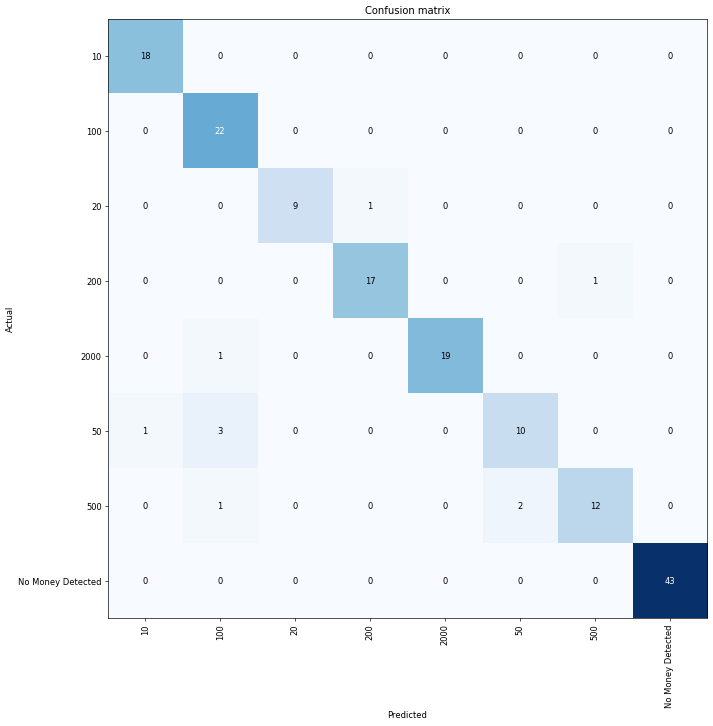

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)